# Project Vaccine usage prediction

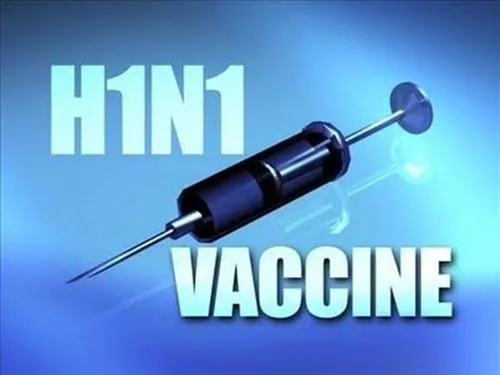

# Load the dataset

In [4]:
import pandas as pd

# Load dataset
path = "h1n1_vaccine_prediction.csv"
data = pd.read_csv(path)

# Display the first few rows of the dataset
data.head(1)


,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0


# EDA

In [5]:
data.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [6]:
data.shape

(26707, 34)

In [8]:
df = data.dropna()

In [9]:
df.shape

(11794, 34)

In [10]:
df.isna().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

# Features and Target

In [12]:
X = df.drop(['h1n1_vaccine'], axis=1)

y = df['h1n1_vaccine']


# Feature Engineering

In [17]:
X  = pd.get_dummies(df,drop_first=True)

# Split the dataset

In [18]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train , y_test=train_test_split(X,y, test_size=.25, random_state=42)

# Fit the Logistic Regression model

In [21]:
from sklearn.linear_model import LogisticRegression

In [23]:
model = LogisticRegression()

model.fit(X_train,y_train)

print(f"Training Score : {model.score(X_train, y_train)}")
print(f"Testing Score : {model.score(X_test, y_test)}")

Training Score : 0.9935556811758055
Testing Score : 0.9928789420142421


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Predict the probabilities and class labels

In [25]:
pred_train  =  model.predict(X_train)
pred_test  =  model.predict(X_test)

# Evaluate the model

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
confusion_matrix(y_train , pred_train)

array([[6148,   18],
       [  39, 2640]], dtype=int64)

In [28]:
cnfTrain=pd.DataFrame(confusion_matrix(y_train , pred_train), columns=["Pred_0", "Pred_1"],
                index=["Act_0", "Act_1"])
cnfTrain

,Pred_0,Pred_1
Act_0,6148,18
Act_1,39,2640


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6166
           1       0.99      0.99      0.99      2679

    accuracy                           0.99      8845
   macro avg       0.99      0.99      0.99      8845
weighted avg       0.99      0.99      0.99      8845



In [32]:
pd.DataFrame(model.predict_proba(X_train), columns=["Prob_0", "Prob_1"])

,Prob_0,Prob_1
0,0.990352,0.009648
1,0.999980,0.000020
2,0.999577,0.000423
3,0.999237,0.000763
4,0.999987,0.000013
...,...,...
8840,0.999993,0.000007
8841,0.003042,0.996958
8842,0.000001,0.999999
8843,0.989804,0.010196


In [33]:
from sklearn import metrics

In [40]:
model_report = pd.DataFrame()

tmp = pd.Series({'Model': " Logical Regression ",
                 'ROC Score' : metrics.roc_auc_score(y_test, pred_test),
                 'Precision Score': metrics.precision_score(y_test, pred_test),
                 'Recall Score': metrics.recall_score(y_test, pred_test),
                 'F1 Score' : metrics.f1_score(y_test, pred_test),
                 'Accuracy Score': metrics.accuracy_score(y_test, pred_test)}, name = 0)

model_logR_report = pd.concat([model_report,tmp]).T
model_logR_report

,Model,ROC Score,Precision Score,Recall Score,F1 Score,Accuracy Score
0,Logical Regression,0.990045,0.993127,0.982993,0.988034,0.992879
